# Video Recommender System
## 1 - Data Analysis
I initially did some data analysis to explore different features of the datasets. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading taxonomy file
taxonomy = pd.read_csv('sample_taxonomy.csv', encoding='latin-1')
taxonomy.columns = ['videoId', 'taxonomy', 'attribute_type']

# Reading video data file
video_data = pd.read_csv('sample_video_data.csv', encoding='latin-1')

Here are some info about the taxonomy dataset:

In [2]:
# Check the top 5 rows
print(taxonomy.head())

                     videoId     taxonomy attribute_type
0  facebook10155026108719205    Upsetting      adjective
1  facebook10155026108719205  Interesting      adjective
2  facebook10155026108719205    Emotional      adjective
3  facebook10155026108719205  Informative      adjective
4  facebook10155026108719205   Disturbing      adjective


In [3]:
# Check the file info
print(taxonomy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 3 columns):
videoId           7909 non-null object
taxonomy          7909 non-null object
attribute_type    7909 non-null object
dtypes: object(3)
memory usage: 185.4+ KB
None


### Taxonomy Names
Let's take a look at **taxonomy names** and see which ones appear most often.

In [4]:
# Convert taxonomy dtype from object to string
taxonomy['taxonomy'] = taxonomy['taxonomy'].astype('str')
taxonomy['taxonomy'] = taxonomy['taxonomy'].str.replace(" ", "")

# Sort by taxonomy counts
df = taxonomy.groupby('taxonomy')['videoId'].nunique().sort_values(ascending=False).reset_index(name='count')
print(df.head(20))

     taxonomy  count
0       Human    100
1        Text    100
2      Person    100
3      People    100
4        Word    100
5      Poster     99
6       Paper     94
7    Brochure     94
8       Flyer     94
9    Clothing     94
10      Crowd     93
11      Child     91
12   Audience     91
13        Kid     91
14       Baby     90
15  Trademark     89
16       Coat     89
17   Overcoat     89
18     Speech     89
19       Logo     89


Looks like the top 5 taxonomy names are Human, Text, Person, People, and Word.

Now, let's look at the video dataset:

In [5]:
# Check the top 5 rows
print(video_data.head())

                     videoId  \
0  facebook10155026108719205   
1  facebook10153925858929205   
2  facebook10154944144584205   
3  facebook10153752474144205   
4  facebook10153734907314205   

                                               title  duration  \
0      White Teens Lynch Biracial Eight-Year-Old Boy   379.369   
1                  Cop Fired For NOT Killing Someone   409.203   
2         This Viral Rant Tries to Equate BLM to KKK   372.094   
3             Why Û÷Black Lives Matter Is Important   733.098   
4  Tomi Lahrens STUPID Response To Jesse Williams...   849.871   

   totalVideoPlayCount              trackedSince                  lastPlay  \
0             78639239  2017-09-12T16:00:00.000Z  2018-06-04T20:55:30.000Z   
1             25609157  2016-09-15T01:00:00.000Z  2018-06-04T20:55:00.000Z   
2             16905195  2017-08-15T03:30:50.000Z  2018-06-04T20:55:58.000Z   
3               561147  2016-07-08T15:00:00.000Z  2018-06-04T20:54:28.000Z   
4               3712

In [6]:
# Check the file info
print(video_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
videoId                                   100 non-null object
title                                     100 non-null object
duration                                  100 non-null float64
totalVideoPlayCount                       100 non-null int64
trackedSince                              100 non-null object
lastPlay                                  100 non-null object
sentiment                                 100 non-null object
averageWordsOnScreenFirst10Seconds        96 non-null float64
maxWordsOnScreenFirst10Seconds            96 non-null float64
minWordsOnScreenFirst10Seconds            96 non-null float64
wordsFirst10Seconds                       99 non-null float64
wordsPerSecondFirst10Seconds              96 non-null float64
totalVideoViews                           100 non-null int64
averageShotChangesPer10Seconds            100 non-null int64
averageWordDurationFirst10Seco

As **Seconds Per View** is an important feature, I add it in the dataframe:

In [7]:
# Add new column Seconds per View
video_data['SecondsPerView'] = video_data['totalSecondsViewed'] / video_data['totalVideoViews']

### Video Titles
Are there certain words that feature more often in **Video Titles?** I'll attempt to figure this out using a word-cloud visualization.

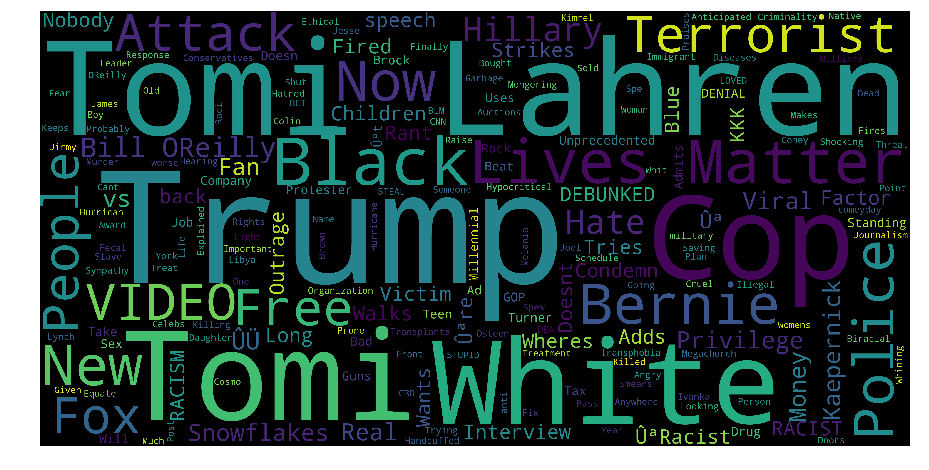

In [8]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the video titles
video_data['title'] = video_data['title'].fillna("").astype('str')
title_corpus = ' '.join(video_data['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Seems like Tomi, Trump, White, Lahren, Terrorist, Cop, Bernie, New, Fox, Police, Free etc. are the most popular words in the video titles.

### Video Duration
Let's explore the **Duration** attribute.

In [10]:
# Get summary statistics of video duration
video_data['duration'].describe()

count     100.000000
mean      404.046690
std       206.183976
min       138.217000
25%       289.203000
50%       322.421000
75%       437.822250
max      1157.559000
Name: duration, dtype: float64

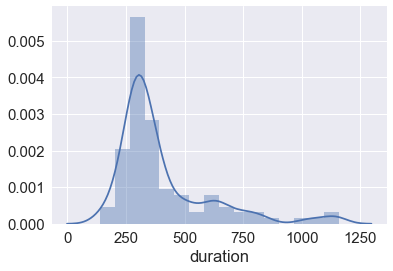

In [11]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of duration
sns.distplot(video_data['duration'].fillna(video_data['duration'].median()))

Let's also take a look at a subset of 10 longest videos.

In [12]:
# Display 10 longest videos
video_data[['title','comprehendTopTenPhrases', 'description', 'duration', 'SecondsPerView']].sort_values('duration', ascending=False).head(10)

,title,comprehendTopTenPhrases,description,duration,SecondsPerView
79,Who Is Cenk Uygur Voting For?,"[""donald trump"",""hillary clinton"",""gary johnso...",ItÛªs decision time. Cenk Uygur breaks down h...,1157.559,129.196982
73,Police Attack NoDAPL Protesters At Standing Rock,"[""north dakota"",""&gt;&gt;"",""pipeline"",""people""...",Police attack #NoDAPL protesters at Standing Rock,1136.405,85.135897
52,BOMBSHELL: Donna Brazile Admits DNC Rigged Pri...,"[""dnc"",""hillary"",""donna brazile"",""hillary clin...",BOMBSHELL: Donna Brazile Admits DNC Rigged Pri...,1078.931,88.322711
60,Hillary Takes Millions From Fossil Fuel Indust...,"[""hillary clinton"",""bernie sanders"",""washingto...",Hillary Clinton says sheÛªs tired of Bernie S...,1015.104,106.805031
4,Tomi Lahrens STUPID Response To Jesse Williams...,"[""white people"",""same crimes"",""black children""...",During the BET Awards Actor Jesse Williams spo...,849.871,94.219192
83,Tomi Lahren: Black Lives Matter Is New KKK,"[""dallas"",""&gt;&gt;"",""last night"",""and"",""peopl...",Tomi Lahren says #BlackLivesMatter is the new ...,805.660,102.272746
39,White People With Guns NOT Killed By Cops (VID...,"[""gun"",""&gt;&gt;"",""boom"",""white guy"",""cops"",""r...","There have been certain instances, caught on t...",786.481,94.945304
99,Police Brutally Beat Black Man For Jaywalking,"[""video"",""person"",""resisting officer"",""eric ga...",Police BRUTALLY beat black man for jaywalking....,748.286,88.017758
3,Why Û÷Black Lives Matter Is Important,"[""gun"",""1960s"",""black"",""alton sterling"",""ameri...",Here is why Û÷Black Lives MatterÛª is import...,733.098,76.636128
55,BREAKING: Cop Who Murdered Walter Scott Walks ...,"[""walter scott"",""life"",""my taser"",""country"",""v...",BREAKING: Killer Cop who MURDERED Walter Scott...,690.768,68.025123


### Video Play Count
Let's explore the **Total Video Play Count** attribute.

In [13]:
# Get summary statistics of total video play count
video_data['totalVideoPlayCount'].describe()

count    1.000000e+02
mean     4.356119e+06
std      8.684418e+06
min      5.611000e+03
25%      1.148498e+06
50%      2.156486e+06
75%      4.075521e+06
max      7.863924e+07
Name: totalVideoPlayCount, dtype: float64

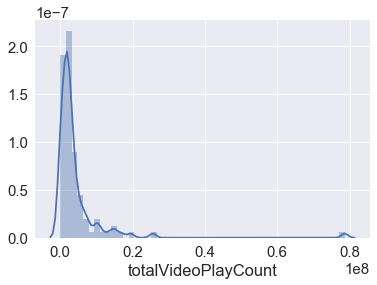

In [14]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of total play count
sns.distplot(video_data['totalVideoPlayCount'].fillna(video_data['totalVideoPlayCount'].median()))

Let's also take a look at a subset of 10 videos with the most total play counts.

In [15]:
# Display 10 videos with most total play counts
video_data[['title','comprehendTopTenPhrases', 'description', 'totalVideoPlayCount', 'SecondsPerView']].sort_values('totalVideoPlayCount', ascending=False).head(10)

,title,comprehendTopTenPhrases,description,totalVideoPlayCount,SecondsPerView
0,White Teens Lynch Biracial Eight-Year-Old Boy,"[""attempted murder"",""table"",""we dont"",""under"",...",White Teens Lynch Biracial Eight-Year-Old Boy....,78639239,53.473153
1,Cop Fired For NOT Killing Someone,"[""stephen mader"",""guy"",""jr"",""right"",""american ...",A good cop was fired for doing the right thing.,25609157,73.110910
7,How Fecal Transplants Can Treat Diseases Drugs...,"[""c. diff"",""poop"",""ryan"",""donors"",""kind"",""ryan...",Would you get a poop injection if it could sav...,19475503,42.735171
2,This Viral Rant Tries to Equate BLM to KKK,"[""nazis"",""tomi"",""trump"",""donald trump"",""charlo...",,16905195,54.535263
9,RACIST New York PostÛÜ Smears Black Murder Vi...,"[""post"",""caughman"",""new york post"",""killer"",""p...",RACIST New York Post Smears Black Murder Victi...,15157266,45.728364
8,transphobia > military,"[""tomi"",""military"",""shit"",""ya"",""fact"",""twitter...",Tomi Lahren cares more about discriminating ag...,14575749,46.530889
6,Tomi Doesnt Get The Point of Womens Rights,"[""tomi"",""women"",""special treatment"",""abortions...",Tomi thinks women that fight for her rights ar...,13026944,67.796099
27,People Are Being Bought And Sold In Slave Auct...,"[""libya"",""cnn"",""us"",""slavery"",""people"",""migran...",Human beings are being bought and sold for $40...,11161914,26.760314
11,Fear Mongering with Dead Children,"[""islam"",""tomi"",""manchester"",""muslim"",""muslims...",Tomi Lahren and Tucker Carlson Tonight use the...,10336922,50.407661
12,Tomi is now anti-free speech,"[""tomi"",""anthem"",""free speech"",""nfl"",""american...",LOL Tomi Lahren forgets she was fired and sued...,10045898,58.061509


### Video Impressions
Let's explore the **Total Video Impressions** attribute.

In [16]:
# Get summary statistics of total video impressions
video_data['totalVideoImpressions'].describe()

count    1.000000e+02
mean     1.329540e+07
std      2.068388e+07
min      1.317194e+06
25%      4.672096e+06
50%      7.034528e+06
75%      1.383673e+07
max      1.803211e+08
Name: totalVideoImpressions, dtype: float64

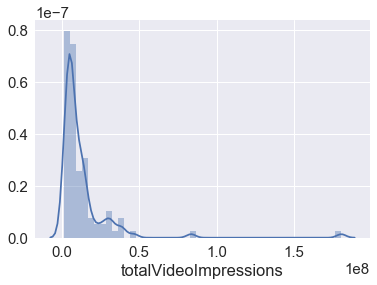

In [17]:
%matplotlib inline
# Display distribution of total impressions
sns.distplot(video_data['totalVideoImpressions'].fillna(video_data['totalVideoImpressions'].median()))

Let's also take a look at a subset of 10 videos with the most total video impressions.

In [18]:
# Display 10 videos with most total impressions
video_data[['title', 'comprehendTopTenPhrases', 'description', 'totalVideoImpressions', 'SecondsPerView']].sort_values('totalVideoImpressions', ascending=False).head(10)

,title,comprehendTopTenPhrases,description,totalVideoImpressions,SecondsPerView
0,White Teens Lynch Biracial Eight-Year-Old Boy,"[""attempted murder"",""table"",""we dont"",""under"",...",White Teens Lynch Biracial Eight-Year-Old Boy....,180321061,53.473153
1,Cop Fired For NOT Killing Someone,"[""stephen mader"",""guy"",""jr"",""right"",""american ...",A good cop was fired for doing the right thing.,83506256,73.110910
6,Tomi Doesnt Get The Point of Womens Rights,"[""tomi"",""women"",""special treatment"",""abortions...",Tomi thinks women that fight for her rights ar...,46528707,67.796099
9,RACIST New York PostÛÜ Smears Black Murder Vi...,"[""post"",""caughman"",""new york post"",""killer"",""p...",RACIST New York Post Smears Black Murder Victi...,39756026,45.728364
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"[""trump"",""ivanka trump"",""donald trump"",""cosmo""...",Ivanka Trump recently lost her cool during an ...,38574984,151.742070
2,This Viral Rant Tries to Equate BLM to KKK,"[""nazis"",""tomi"",""trump"",""donald trump"",""charlo...",,37215176,54.535263
3,Why Û÷Black Lives Matter Is Important,"[""gun"",""1960s"",""black"",""alton sterling"",""ameri...",Here is why Û÷Black Lives MatterÛª is import...,33166953,76.636128
8,transphobia > military,"[""tomi"",""military"",""shit"",""ya"",""fact"",""twitter...",Tomi Lahren cares more about discriminating ag...,31707843,46.530889
4,Tomi Lahrens STUPID Response To Jesse Williams...,"[""white people"",""same crimes"",""black children""...",During the BET Awards Actor Jesse Williams spo...,31702848,94.219192
10,The OÛªRacist Factor Strikes Again. Bill ORei...,"[""bill oÛªreilly"",""way"",""maxine waters"",""oÛª...",The OÛªRacist Factor Strikes Again. Bill ORei...,29915327,70.390962


### Seconds Per View
Okay, let's explore the **Seconds Per View** metric.

In [19]:
# Get summary statistics of seconds per view
video_data['SecondsPerView'].describe()

count    100.000000
mean      68.210692
std       23.568827
min       18.125121
25%       51.533544
50%       63.933285
75%       81.467205
max      151.742070
Name: SecondsPerView, dtype: float64

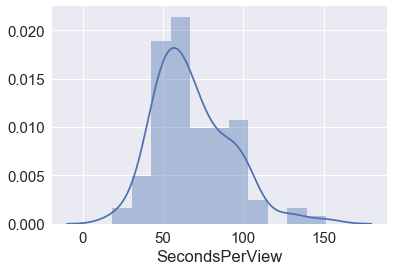

In [20]:
%matplotlib inline
# Display distribution of total seconds viewed
sns.distplot(video_data['SecondsPerView'].fillna(video_data['SecondsPerView'].median()))

Let's also take a look at a subset of 10 videos with the highest seconds per view.

In [21]:
# Display 10 videos with highest seconds per view
video_data[['title', 'comprehendTopTenPhrases', 'description', 'SecondsPerView']].sort_values('SecondsPerView', ascending=False).head(10)

,title,comprehendTopTenPhrases,description,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"[""trump"",""ivanka trump"",""donald trump"",""cosmo""...",Ivanka Trump recently lost her cool during an ...,151.742070
91,OReilly Tries To Help Trump Win Black Voters. ...,"[""trump"",""jobs"",""hillary clinton"",""donald trum...",Bill OReilly had Donald J. Trump on to talk ab...,131.920318
79,Who Is Cenk Uygur Voting For?,"[""donald trump"",""hillary clinton"",""gary johnso...",ItÛªs decision time. Cenk Uygur breaks down h...,129.196982
34,Cop Beats Down Handcuffed Woman In Front Of He...,"[""woman"",""october"",""video"",""cops"",""one right"",...",Salt Lake City Police have been forced to rele...,114.892296
60,Hillary Takes Millions From Fossil Fuel Indust...,"[""hillary clinton"",""bernie sanders"",""washingto...",Hillary Clinton says sheÛªs tired of Bernie S...,106.805031
98,Tomi Lahren Defends Kanye From Social Justice ...,"[""trump"",""donald trump"",""kanye"",""andrea bocell...",Tomi Lahren is mad that no one wants to perfor...,104.143145
83,Tomi Lahren: Black Lives Matter Is New KKK,"[""dallas"",""&gt;&gt;"",""last night"",""and"",""peopl...",Tomi Lahren says #BlackLivesMatter is the new ...,102.272746
89,Trump Mocks Christians Who Voted For Him,"[""donald trump"",""trump"",""mike pence"",""side"",""o...",Trump Mocks Christians Who Voted For Him,102.248133
78,Fox Uses TYT Bernie Interview To Attack Hillar...,"[""hillary clinton"",""bernie sanders"",""clinton"",...",Fox News used clips from TYTÛªs interview wit...,101.089706
16,Tomi LahrenÛÜ Was Given A Free Pass To Spew M...,"[""trump"",""tomi"",""hate"",""women"",""russia"",""her h...",The Difference Between Normalizing Tomi Lahren...,100.868949


### Comprehend Top 10 Phrases
This metadata variable will surely be important while building the recommendation engines since it partially describes the content of the video. A basic assumption is that videos with similar phrases should have similar contents. I'll attempt to see exactly which phrases are the most popular.

In [22]:
# Modify comprehendTop10Phrases column
video_data['comprehendTopTenPhrases'] = video_data.comprehendTopTenPhrases.str.replace('"', '')
video_data['comprehendTopTenPhrases'] = video_data.comprehendTopTenPhrases.str.replace('[', '')
video_data['comprehendTopTenPhrases'] = video_data.comprehendTopTenPhrases.str.replace(']', '')
print(video_data['comprehendTopTenPhrases'].head(20))

0     attempted murder,table,we dont,under,mark chas...
1     stephen mader,guy,jr,right,american hero,syste...
2     nazis,tomi,trump,donald trump,charlottesville,...
3     gun,1960s,black,alton sterling,america,people,...
4     white people,same crimes,black children,more l...
5     trump,ivanka trump,donald trump,cosmo,person,c...
6     tomi,women,special treatment,abortions,victim,...
7     c. diff,poop,ryan,donors,kind,ryan schneiderma...
8     tomi,military,shit,ya,fact,twitter,our veteran...
9     post,caughman,new york post,killer,police,vict...
10    bill oÛªreilly,way,maxine waters,oÛªreilly,a...
11    islam,tomi,manchester,muslim,muslims,tucker,sa...
12    tomi,anthem,free speech,nfl,american,america,r...
13    donald trump,united states,visa,melania trump,...
14    tomi,trump,north korea,middle east,obama,syria...
15    bill,bill oÛªreilly,kaepernick,americans,amer...
16    trump,tomi,hate,women,russia,her hypocrisy,vie...
17    prone to criminality,new york,violent city

In [23]:
# Make a census of the phrase keywords
phrase_labels = set()
for s in video_data['comprehendTopTenPhrases'].str.split(',').values:
    phrase_labels = phrase_labels.union(set(s))

# Function that counts the number of times each of the phrase keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split(','):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of phrase keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(video_data, 'comprehendTopTenPhrases', phrase_labels)
keyword_occurences[:5]

[['trump', 33],
 ['people', 22],
 ['america', 21],
 ['donald trump', 19],
 ['tomi', 16]]

The top 5 phrases are, in that respect order: trump, people, america, donald trump, and tomi. I'll show this on a wordcloud too in order to make it more visually appealing.

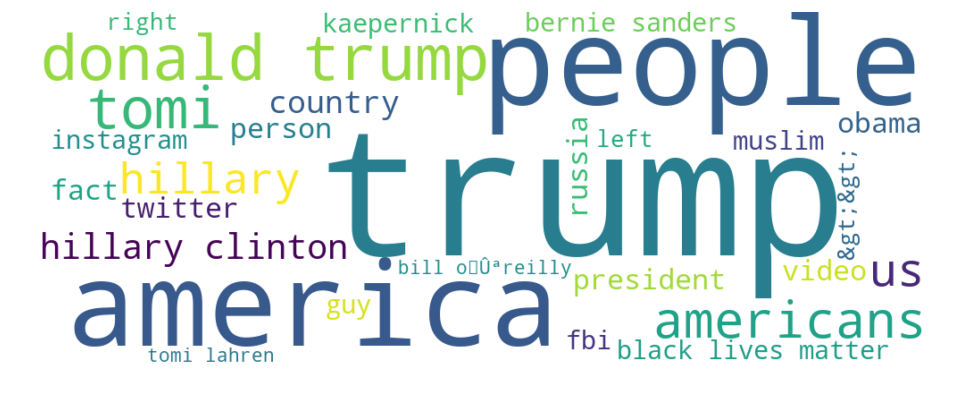

In [24]:
# Define the dictionary used to produce the phrase wordcloud
phrases = dict()
trunc_occurences = keyword_occurences[0:29]
for s in trunc_occurences:
    phrases[s[0]] = s[1]

# Create the wordcloud
phrase_wordcloud = WordCloud(width=1000,height=400, background_color='white')
phrase_wordcloud.generate_from_frequencies(phrases)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(phrase_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Video Description
This metadata variable will also be important while building the recommendation engines since it also partially describes the content of the video. A basic assumption is that videos with similar description should have similar contents. I'll attempt to see words thate feature more often in the video descriptions.

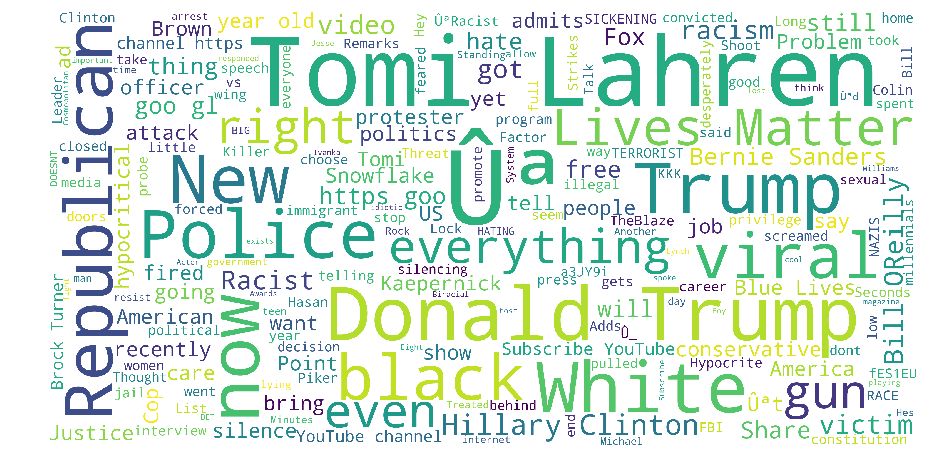

In [25]:
%matplotlib inline

# Create a wordcloud of the video descriptions
video_data['description'] = video_data['description'].fillna("").astype('str')
description_corpus = ' '.join(video_data['description'])
description_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(description_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

## Content-Based Recommendation Model
To personalise the recommendations, I am going to build an engine that computes similarity between videos based on certain metrics and suggests videos that are most similar to another particular video. Since I will be using video metadata (or content) to build this engine, this also known as **Content Based Filtering**.

I will build two Content Based Recommenders based on:
* Comprehend Top 10 Phrases
* Description

### Phrase-Based Recommender
I go ahead with the **comprehendTopTenPhrases** feature:

In [26]:
# Break up the big phrases string into string arrays
video_data['comprehendTopTenPhrases'] = video_data['comprehendTopTenPhrases'].str.split(',')
# Convert phrases to string value
video_data['comprehendTopTenPhrases'] = video_data['comprehendTopTenPhrases'].fillna("").astype('str')

I do not have a quantitative metric to judge the machine's performance so this will have to be done qualitatively. In order to do so, I'll use **TfidfVectorizer** function from **scikit-learn**, which transforms text to feature vectors that can be used as input to estimator.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(video_data['comprehendTopTenPhrases'])
tfidf_matrix.shape

(100, 1647)

I will be using the **Cosine Similarity** to calculate a numeric quantity that denotes the similarity between two videos. Since I have used the TF-IDF Vectorizer, calculating the Dot Product will directly give me the Cosine Similarity Score. Therefore, I will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [28]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:5, :5]

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.01325242, 0.02125131],
       [0.        , 0.        , 0.01325242, 1.        , 0.11731181],
       [0.        , 0.        , 0.02125131, 0.11731181, 1.        ]])

I now have a pairwise cosine similarity matrix for all the videos in the dataset. The next step is to write a function that returns the 30 most similar videos based on the cosine similarity score.

In [33]:
indices = pd.Series(video_data.index, index=video_data['title'])

# Function that get video recommendations based on the cosine similarity score of top 10 phrases
def phrase_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    video_indices = [i[0] for i in sim_scores]
    
    videos = video_data.iloc[video_indices][['title', 'comprehendTopTenPhrases', 'SecondsPerView']]
    videos = videos.sort_values('SecondsPerView', ascending=False)
    return videos

Let's try and get the top 10 recommendations for a few videos and see how good the recommendations are.

In [34]:
phrase_recommendations('Police Brutally Beat Black Man For Jaywalking').head(10)

,title,comprehendTopTenPhrases,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"['trump', 'ivanka trump', 'donald trump', 'cos...",151.742070
34,Cop Beats Down Handcuffed Woman In Front Of He...,"['woman', 'october', 'video', 'cops', 'one rig...",114.892296
50,Cop Tased Teen Into Brain Damage (VIDEO),"['car', 'kid', 'am i under', 'anything officer...",97.851001
87,Impeachment Ad Triggers Fox News Fans,"['trump', 'money', 'donald trump', 'north kore...",97.604310
4,Tomi Lahrens STUPID Response To Jesse Williams...,"['white people', 'same crimes', 'black childre...",94.219192
73,Police Attack NoDAPL Protesters At Standing Rock,"['north dakota', '&gt;&gt;', 'pipeline', 'peop...",85.135897
14,Tomis back and worse than before.,"['tomi', 'trump', 'north korea', 'middle east'...",83.166441
13,Melania Trump Probably An Illegal Immigrant,"['donald trump', 'united states', 'visa', 'mel...",80.900794
3,Why Û÷Black Lives Matter Is Important,"['gun', '1960s', 'black', 'alton sterling', 'a...",76.636128
1,Cop Fired For NOT Killing Someone,"['stephen mader', 'guy', 'jr', 'right', 'ameri...",73.110910


In [35]:
phrase_recommendations('White Teens Lynch Biracial Eight-Year-Old Boy').head(10)

,title,comprehendTopTenPhrases,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"['trump', 'ivanka trump', 'donald trump', 'cos...",151.742070
16,Tomi LahrenÛÜ Was Given A Free Pass To Spew M...,"['trump', 'tomi', 'hate', 'women', 'russia', '...",100.868949
4,Tomi Lahrens STUPID Response To Jesse Williams...,"['white people', 'same crimes', 'black childre...",94.219192
22,If You Attack Jimmy Kimmel YouÛªre a Garbage ...,"['obamacare', 'andy', 'cnn', 'joe walsh', 'kim...",91.574103
14,Tomis back and worse than before.,"['tomi', 'trump', 'north korea', 'middle east'...",83.166441
13,Melania Trump Probably An Illegal Immigrant,"['donald trump', 'united states', 'visa', 'mel...",80.900794
17,CNN Cop: Black People More Prone To Criminality,"['prone to criminality', 'new york', 'violent ...",79.173668
3,Why Û÷Black Lives Matter Is Important,"['gun', '1960s', 'black', 'alton sterling', 'a...",76.636128
1,Cop Fired For NOT Killing Someone,"['stephen mader', 'guy', 'jr', 'right', 'ameri...",73.110910
10,The OÛªRacist Factor Strikes Again. Bill ORei...,"['bill o\x89Ûªreilly', 'way', 'maxine waters',...",70.390962


In [36]:
phrase_recommendations('Tomi Doesnt Get The Point of Womens Rights').head(10)

,title,comprehendTopTenPhrases,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"['trump', 'ivanka trump', 'donald trump', 'cos...",151.742070
34,Cop Beats Down Handcuffed Woman In Front Of He...,"['woman', 'october', 'video', 'cops', 'one rig...",114.892296
16,Tomi LahrenÛÜ Was Given A Free Pass To Spew M...,"['trump', 'tomi', 'hate', 'women', 'russia', '...",100.868949
4,Tomi Lahrens STUPID Response To Jesse Williams...,"['white people', 'same crimes', 'black childre...",94.219192
14,Tomis back and worse than before.,"['tomi', 'trump', 'north korea', 'middle east'...",83.166441
44,Millionaire Tells Millennials To Get Off Their...,"['marcus', 'any job', 'camping world', 'home',...",77.050574
3,Why Û÷Black Lives Matter Is Important,"['gun', '1960s', 'black', 'alton sterling', 'a...",76.636128
31,Viral Video Attacks Celebs Trying to Raise Mon...,"['climate change', 'people', 'stevie wonder', ...",76.366762
1,Cop Fired For NOT Killing Someone,"['stephen mader', 'guy', 'jr', 'right', 'ameri...",73.110910
10,The OÛªRacist Factor Strikes Again. Bill ORei...,"['bill o\x89Ûªreilly', 'way', 'maxine waters',...",70.390962


### Description-Based Recommender
Now I'll do the same thing for **description** feature:

In [37]:
video_data['description'] = video_data['description'].str.split(' ')
video_data['description'] = video_data['description'].fillna("").astype('str')

tfidf_matrix = tf.fit_transform(video_data['description'])
tfidf_matrix.shape

(100, 1694)

In [38]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:5, :5]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [39]:
# Function that get video recommendations based on the cosine similarity score of video descriptions
def description_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    video_indices = [i[0] for i in sim_scores]
    
    videos = video_data.iloc[video_indices][['title', 'description', 'SecondsPerView']]
    videos = videos.sort_values('SecondsPerView', ascending=False)
    return videos

In [40]:
description_recommendations('Police Brutally Beat Black Man For Jaywalking').head(10)

,title,description,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"['Ivanka', 'Trump', 'recently', 'lost', 'her',...",151.742070
34,Cop Beats Down Handcuffed Woman In Front Of He...,"['Salt', 'Lake', 'City', 'Police', 'have', 'be...",114.892296
16,Tomi LahrenÛÜ Was Given A Free Pass To Spew M...,"['The', 'Difference', 'Between', 'Normalizing'...",100.868949
50,Cop Tased Teen Into Brain Damage (VIDEO),"['WARNING', 'VERY', 'GRAPHIC.', 'A', 'police',...",97.851001
39,White People With Guns NOT Killed By Cops (VID...,"['There', 'have', 'been', 'certain', 'instance...",94.945304
4,Tomi Lahrens STUPID Response To Jesse Williams...,"['During', 'the', 'BET', 'Awards', 'Actor', 'J...",94.219192
73,Police Attack NoDAPL Protesters At Standing Rock,"['Police', 'attack', '#NoDAPL', 'protesters', ...",85.135897
14,Tomis back and worse than before.,"['', '']",83.166441
13,Melania Trump Probably An Illegal Immigrant,"['It', 'turns', 'out', 'there\x89Ûªs', 'a', 'v...",80.900794
17,CNN Cop: Black People More Prone To Criminality,"['A', 'CNN', 'panel', 'recently', 'got', 'a', ...",79.173668


In [41]:
description_recommendations('White Teens Lynch Biracial Eight-Year-Old Boy').head(10)

,title,description,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"['Ivanka', 'Trump', 'recently', 'lost', 'her',...",151.742070
16,Tomi LahrenÛÜ Was Given A Free Pass To Spew M...,"['The', 'Difference', 'Between', 'Normalizing'...",100.868949
50,Cop Tased Teen Into Brain Damage (VIDEO),"['WARNING', 'VERY', 'GRAPHIC.', 'A', 'police',...",97.851001
39,White People With Guns NOT Killed By Cops (VID...,"['There', 'have', 'been', 'certain', 'instance...",94.945304
4,Tomi Lahrens STUPID Response To Jesse Williams...,"['During', 'the', 'BET', 'Awards', 'Actor', 'J...",94.219192
22,If You Attack Jimmy Kimmel YouÛªre a Garbage ...,"['Jimmy', 'Kimmel\x89Ûªs', 'emotional', 'monol...",91.574103
86,Teacher FIRED For Having Fun On Vacation,"['A', '24-year-old', 'teacher', 'was', 'forced...",91.470989
14,Tomis back and worse than before.,"['', '']",83.166441
13,Melania Trump Probably An Illegal Immigrant,"['It', 'turns', 'out', 'there\x89Ûªs', 'a', 'v...",80.900794
17,CNN Cop: Black People More Prone To Criminality,"['A', 'CNN', 'panel', 'recently', 'got', 'a', ...",79.173668


In [42]:
description_recommendations('Tomi Doesnt Get The Point of Womens Rights').head(10)

,title,description,SecondsPerView
5,Angry Ivanka Trump Walks Out Of Cosmo Interview,"['Ivanka', 'Trump', 'recently', 'lost', 'her',...",151.742070
98,Tomi Lahren Defends Kanye From Social Justice ...,"['Tomi', 'Lahren', 'is', 'mad', 'that', 'no', ...",104.143145
83,Tomi Lahren: Black Lives Matter Is New KKK,"['Tomi', 'Lahren', 'says', '#BlackLivesMatter'...",102.272746
16,Tomi LahrenÛÜ Was Given A Free Pass To Spew M...,"['The', 'Difference', 'Between', 'Normalizing'...",100.868949
4,Tomi Lahrens STUPID Response To Jesse Williams...,"['During', 'the', 'BET', 'Awards', 'Actor', 'J...",94.219192
69,Bernie Sanders Giving The Establishment A Head...,"['POLITICO', 'has', 'a', 'new', 'article', 'ab...",86.280705
3,Why Û÷Black Lives Matter Is Important,"['Here', 'is', 'why', '\x89Û÷Black', 'Lives', ...",76.636128
1,Cop Fired For NOT Killing Someone,"['A', 'good', 'cop', 'was', 'fired', 'for', 'd...",73.110910
63,"Trump Wants To Abolish The DEP, Which DoesnÛª...","['Donald', 'Trump', 'has', 'been', 'talking', ...",69.002961
62,ALL LIVES MATTER Has Always Been A Racist Group,"['ALL', 'LIVES', 'MATTER', 'Always', 'Meant', ...",65.836948
